### Statistics 101

## Mean, Median and Mode: What Are they and When Should You Use Them

This notebook contains the code and charts used in the article above (but not necessarily in the right order!) and some other code that I did not use.

There is also some data about highly paid soccer players that I did not use in the article


In [1]:
import matplotlib.pyplot as plt

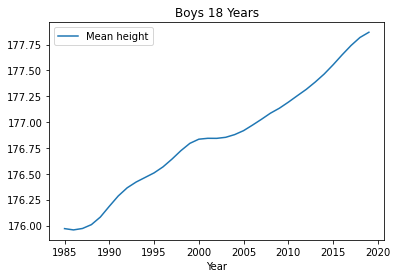

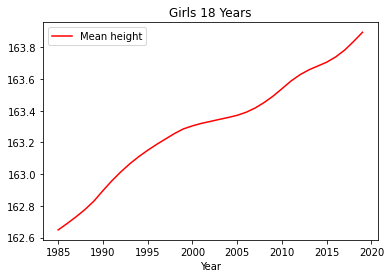

In [2]:
# https://ncdrisc.org/
# our world in data CC BY

import pandas as pd
height = pd.read_csv('boysheightUK.csv')
height = height[height['Age group']== 18]
#print(hb)


height[height['Sex']=='Boys'].plot(x='Year',y='Mean height', title='Boys 18 Years')
plt.savefig('images/boysheight.png')
height[height['Sex']=='Girls'].plot(x='Year',y='Mean height', title='Girls 18 Years', color = 'Red')
plt.savefig('images/girlssheight.png')
#height

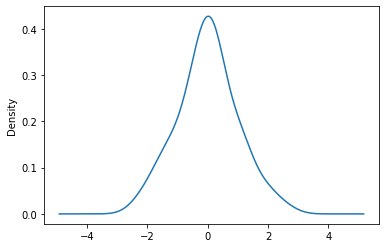

In [3]:
n = pd.read_csv('norm100.csv')
n.plot.density(legend=False)
plt.savefig('images/normal.png')

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1,0
894,136A,68.5,65.0,M,67.7,8,1,0
895,136A,68.5,65.0,F,64.0,8,0,1
896,136A,68.5,65.0,F,63.5,8,0,1


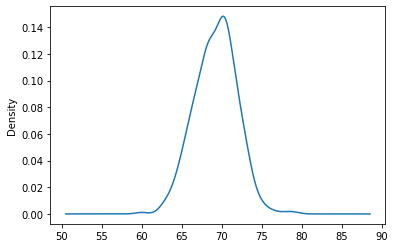

In [4]:
# galton height data source: https://dataverse.harvard.edu/

gal = pd.read_csv('galton-stata11.csv', delimiter='\t')
gal['height'][gal['male']==1].plot.density();
plt.savefig('images/galmaleheight.png')
gal

In [10]:
gal['height'][gal['male']==1].mean()

69.22881720430108


Public data from [Harvard Dataverse](https://dataverse.harvard.edu/)

This works fine because height follows a normal distribution as illustrated here:

Licensed by [Illustrative Mathematics](https://illustrativemathematics.org/) under a
Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International 

In a normal distribution values are distributed evenly around a central point and tail off similarly to the left and right. You can see the mean in the graph above is 70 inches.

![Levante players](https://github.com/alanjones2/Alan-Jones-article-code/raw/master/meanmedianmode/images/levante10.png)

In a normal distribution the mean and the median are the same value but that is not true for other types of distribution.

Take the house price example. In Madrid like in any other major city there are a wide range of properties and prices but there are a small number


In [5]:
import pandas as pd
sal = pd.read_csv('levantesal.csv')

The data come from the web site [Salary Sport](https://salarysport.com/football/la-liga/levante/) and to the best of my knowledge (which is admittedly limited) are, at least indicative of the actual salaries.

In [6]:
print(f"Mean weekly wage with Messi {sal['Weekly Wage'].mean()}")
print(f"Mean weekly wage without Messi {sal[sal['Player Name'] != 'Messi']['Weekly Wage'].mean()}")
print(sal['Weekly Wage'].mean()/sal[sal['Player Name'] != 'Messi']['Weekly Wage'].mean())

Mean weekly wage with Messi 49051.724137931036
Mean weekly wage without Messi 15089.285714285714
3.250765149969394


,Sex,Students,Grade,Percentage
0,Male,339475,A*,18.4
1,Male,339475,A,23.3
2,Male,339475,B,24.3
3,Male,339475,C,19.6
4,Male,339475,D,9.5
5,Male,339475,E,4.2
6,Female,413080,A*,19.7
7,Female,413080,A,26.8
8,Female,413080,B,26.4
9,Female,413080,C,17.5


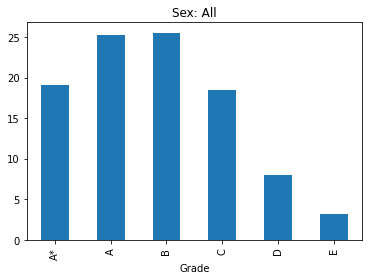

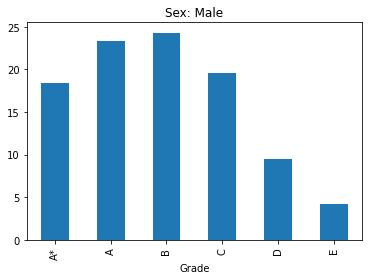

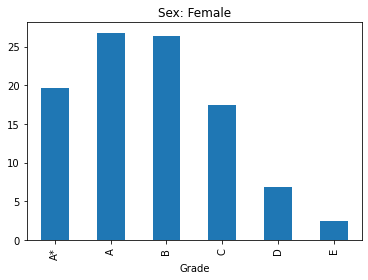

In [7]:
# derived from gov.uk national statistics, Open Government Licence v3.0
grades = pd.read_csv('Alevel2021.csv')

slist = ['All','Male','Female']
for sex in slist:
    grades[grades['Sex']==sex].plot.bar(x='Grade',y='Percentage', legend=False, title=f'Sex: {sex}')
    plt.savefig(f'images/alevel{sex}.png')
grades

In [27]:
res = {'Grade':[ 'A*','A*','A*','A*','A*','A*',
                'A','A','A','A','A','A','A','A',
                'B','B','B','B','B','B','B','B','B',
                'C','C','C','C','C','C',
                'D','D','D',
                'E']}

r = pd.DataFrame(res)
r.mode()


pandas.core.frame.DataFrame

In [33]:
res = {'Grade':[ 'A*','A*','A*','A*','A*','A*',
                'A','A','A','A','A','A','A','A','A',
                'B','B','B','B','B','B','B','B','B',
                'C','C','C','C','C','C',
                'D','D','D',
                'E']}

r = pd.DataFrame(res)
r.mode()


,Grade
0,A
1,B


https://gist.github.com/alanjones2/4d570fc1c9835d4732c1d64bbaaca547

In [8]:
print(f"Median weekly wage with Messi {sal['Weekly Wage'].median()}")
print(f"Median weekly wage without Messi {sal[sal['Player Name'] != 'Messi']['Weekly Wage'].median()}")
print(sal['Weekly Wage'].median()/sal[sal['Player Name'] != 'Messi']['Weekly Wage'].median())

Median weekly wage with Messi 15000.0
Median weekly wage without Messi 14500.0
1.0344827586206897


Mean 834285.7142857143
Median Price    720000.0
dtype: float64


,Price
0,700000
1,720000
2,750000


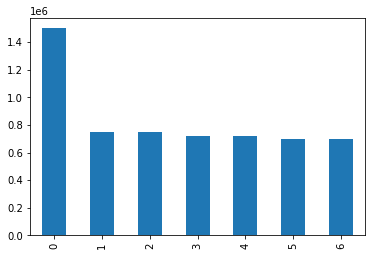

In [32]:
d = {'Price':[1500000,          # Penthouse
              750000,750000,    # Floor 3
              720000,720000,    # Floor 2
              700000,700000     # Floor 1
              ]}

df = pd.DataFrame(d)
df.plot.bar(legend=False)

print(f"Mean {df['Price'].mean()}")
print(f"Median {df['Price'].median()}")
df.mode()

